In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
obs = pd.read_csv('observations.csv', encoding='utf-8')
species = pd.read_csv('species_info.csv', encoding='utf-8')

In [3]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [6]:
# I do this because its earier to work with numbers for charts. And to make it easier for me to get a general overview
# of what im looking at. Its also way faster.

extended_species = species
extended_species = pd.get_dummies(data=extended_species, columns=['category'])
extended_species.head()

,scientific_name,common_names,conservation_status,category_Amphibian,category_Bird,category_Fish,category_Mammal,category_Nonvascular Plant,category_Reptile,category_Vascular Plant
0,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,0,0,0,1,0,0,0
1,Bos bison,"American Bison, Bison",NaN,0,0,0,1,0,0,0
2,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,0,0,0,1,0,0,0
3,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,0,0,0,1,0,0,0
4,Cervus elaphus,Wapiti Or Elk,NaN,0,0,0,1,0,0,0


In [7]:
sums = [extended_species.category_Amphibian.sum(), extended_species.category_Bird.sum(), extended_species.category_Fish.sum(), 
        extended_species.category_Mammal.sum(), extended_species['category_Nonvascular Plant'].sum(), 
        extended_species.category_Reptile.sum(), extended_species['category_Vascular Plant'].sum()]
print(sums)
amount = range(7)

f, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Types of Species')
ax.set_xticks(range(0, 7))
ax.set_xticklabels(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular plant', 'Reptile', 'Vascular_plant'])
ax.bar(range(len(sums)), sums)

plt.savefig('Types_of_Species.png')
plt.clf()

[80, 521, 127, 214, 333, 79, 4470]


<Figure size 1080x432 with 0 Axes>

In [8]:
print(obs.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


[431820, 863332, 576025, 1443562]


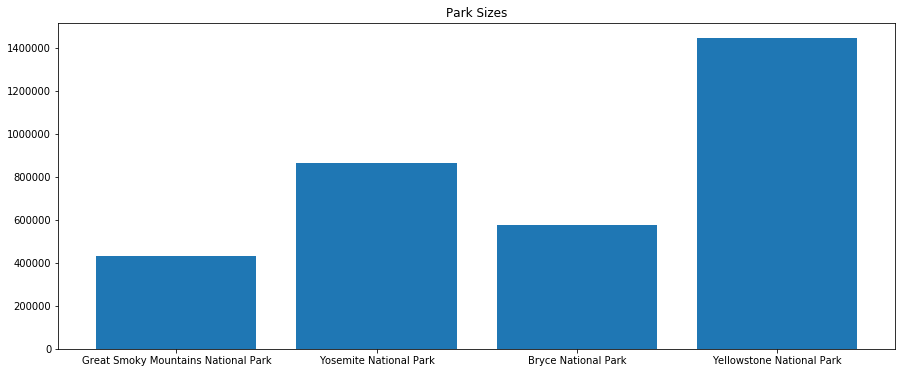

In [9]:
# Splitting up the database into separate pieces, and getting an idea of their sizes.

Bryce = obs[obs.park_name == 'Bryce National Park']
Yosemite = obs[obs.park_name == 'Yosemite National Park']
Smokey_mountains = obs[obs.park_name == 'Great Smoky Mountains National Park']
Yellowstone = obs[obs.park_name == 'Yellowstone National Park']

park_counts = [Smokey_mountains.observations.sum(), Yosemite.observations.sum(), Bryce.observations.sum(),
              Yellowstone.observations.sum()]
lenght = range(len(park_counts))

print(park_counts)

f, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Park Sizes')
ax.set_xticks(lenght)
ax.set_xticklabels(obs.park_name.unique())
ax.bar(lenght, park_counts)

plt.savefig('Park_Sizes.png')

In [10]:
# Fill in all nan values in conservation status.

species['conservation_status'] = species.conservation_status.fillna('No Intervention')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [11]:
# As I previusly stated, I find it easier to work with numbers. This enables creating a new column
# turning conservation status into ordered values (0 to 4).

species['conservation_status'] = pd.Categorical(species['conservation_status'], 
                                                ['No Intervention', 'In Recovery', 'Species of Concern', 
                                                 'Threatened', 'Endangered'], 
                                                ordered=True)

species.conservation_status.unique()

[No Intervention, Species of Concern, Endangered, Threatened, In Recovery]
Categories (5, object): [No Intervention < In Recovery < Species of Concern < Threatened < Endangered]

In [12]:
species['conservation_value'] = species.conservation_status.cat.codes
species.head()

,category,scientific_name,common_names,conservation_status,conservation_value
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,0
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,0
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,0
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,0
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,0


In [13]:
# Again, since this dataset is pretty big I split it into pieces

Mammals = species[species.category == 'Mammal']
Birds = species[species.category == 'Bird']
Reptiles = species[species.category == 'Reptile']
Amphibians = species[species.category == 'Amphibian']
Fish = species[species.category == 'Fish']
Vascular_plant = species[species.category == 'Vascular Plant']
NonVascular_plant = species[species.category == 'Nonvascular Plant']

Endangered = species[species.conservation_status == 'Endangered']
Concern = species[species.conservation_status == 'Species of Concern']

In [14]:
# This is to get all species that need some kind of intervention.
# It is worth noting 'in recovery' a matter of debate whenever it needs some sort of intervention
# or not. I decided to leave it in

Nonnan_Mammals = Mammals[Mammals.conservation_status != 'No Intervention']
Nonnan_Birds = Birds[Birds.conservation_status != 'No Intervention']
Nonnan_Reptiles = Reptiles[Reptiles.conservation_status != 'No Intervention']
Nonnan_Amphibians = Amphibians[Amphibians.conservation_status != 'No Intervention']
Nonnan_Fish = Fish[Fish.conservation_status != 'No Intervention']
Nonnan_Vascular_plant = Vascular_plant[Vascular_plant.conservation_status != 'No Intervention']
Nonnan_NonVascular_plant = NonVascular_plant[NonVascular_plant.conservation_status != 'No Intervention']

Nonnan_Mammals.head()


,category,scientific_name,common_names,conservation_status,conservation_value
7,Mammal,Canis latrans,Coyote,Species of Concern,2
8,Mammal,Canis lupus,Gray Wolf,Endangered,4
9,Mammal,Canis rufus,Red Wolf,Endangered,4
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,2
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,2


[1, 28, 2, 7]


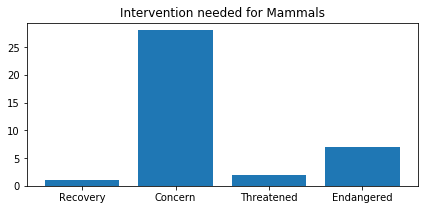

[3, 72, 0, 4]


<Figure size 432x288 with 0 Axes>

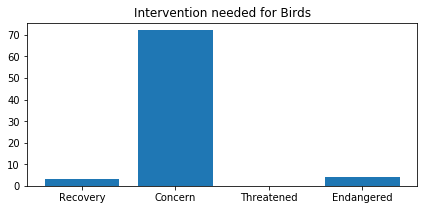

[0, 5, 0, 0]


<Figure size 432x288 with 0 Axes>

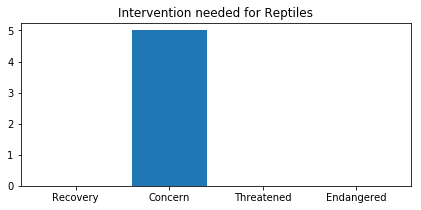

[0, 4, 2, 1]


<Figure size 432x288 with 0 Axes>

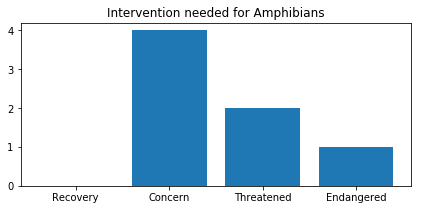

[0, 4, 4, 3]


<Figure size 432x288 with 0 Axes>

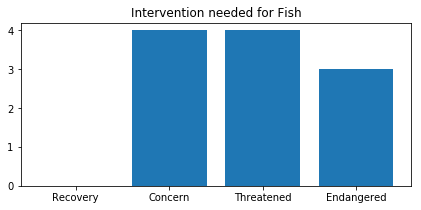

[0, 43, 2, 1]


<Figure size 432x288 with 0 Axes>

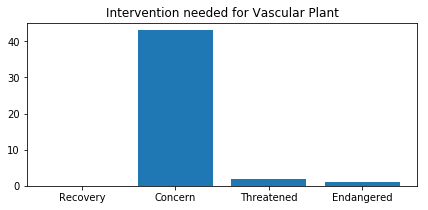

[0, 5, 0, 0]


<Figure size 432x288 with 0 Axes>

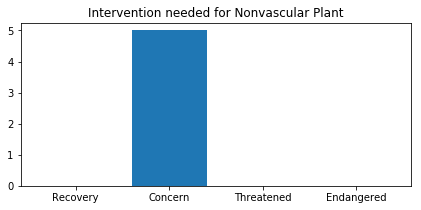

<Figure size 432x288 with 0 Axes>

In [27]:
lenght = range(4)

def create_fig(name, x, y, labels=['Recovery', 'Concern', 'Threatened', 'Endangered']):
    f, ax = plt.subplots(figsize=(7, 3))
    ax.set_title('Intervention needed for {}'.format(name))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.bar(x, y)
    plt.savefig('Intervention_for_' + str(name) + '.png')
    plt.show()
    
def calculate_y(li):
    new_list = []
    for i in range(1, 5):
        new_list.append((li.conservation_value == i).sum())
    return new_list
        
    
large_nonnan_list = [Nonnan_Mammals, Nonnan_Birds, Nonnan_Reptiles, Nonnan_Amphibians, Nonnan_Fish, Nonnan_Vascular_plant,
                    Nonnan_NonVascular_plant]
titles = ['Mammals', 'Birds', 'Reptiles', 'Amphibians', 'Fish', 'Vascular Plant', 'Nonvascular Plant']

number = 0
for i in large_nonnan_list:
    values = calculate_y(i)
    print(values)
    create_fig(titles[number], range(len(values)), values)
    plt.clf()
    number += 1

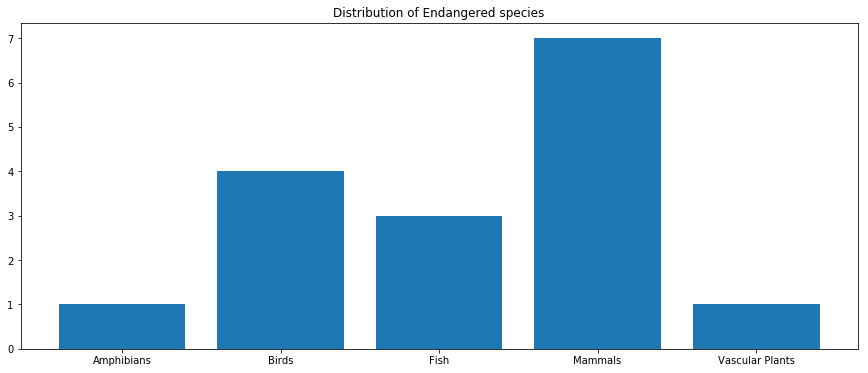

In [47]:
Endangered_list = [1, 4, 3, 7, 1]

Endangered_labels = ['Amphibians', 'Birds', 'Fish', 'Mammals', 'Vascular Plants']

endangered_length = range(len(Endangered_list))

f, ax = plt.subplots(figsize=(15,6))
ax.set_title('Distribution of Endangered species')
ax.set_xticks(endangered_length)
ax.set_xticklabels(Endangered_labels)
ax.bar(endangered_length, Endangered_list)

plt.savefig('Distribution_Endangered.png')

In [16]:
species['intervention_needed'] = (species.conservation_value > 0)
species.head()

,category,scientific_name,common_names,conservation_status,conservation_value,intervention_needed
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,0,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,0,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,0,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,0,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,0,False


In [17]:
no_inter = species.groupby(['category', 'intervention_needed']).scientific_name.nunique().reset_index()\
                            .pivot(columns='intervention_needed',
                                index='category',
                                values='scientific_name').reset_index()
no_inter.columns = ['Animal', 'no_intervention', 'intervention_needed']
no_inter


,Animal,no_intervention,intervention_needed
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [18]:
# 

Amphibian = [7, 72]
Bird = [75, 413]
Fish = [11, 115]
Mammal = [30, 146]
Nonvascular_Plant = [5, 328]
Reptile = [5, 73]
Vascular_Plant = [46, 4216]

def chi2_calk(x, y):
    chi2, pval, dof, expected = chi2_contingency([x, y])
    return "chi2: {}, pval: {}, dof: {} and expected {}".format(str(chi2), str(pval), str(dof), str(expected))

# Amphibians and the others
print('testing significance between Amphibians and; \n')
print("Birds: ", chi2_calk(Amphibian, Bird), "\n")
print("Fish: ", chi2_calk(Amphibian, Fish), "\n")
print("Mammal: ", chi2_calk(Amphibian, Mammal), "\n")
print("Nonvascular Plant: ", chi2_calk(Amphibian, Nonvascular_Plant), "\n")
print("Reptile: ", chi2_calk(Amphibian, Reptile), "\n")
print("Vascular Plant: ", chi2_calk(Amphibian, Vascular_Plant), "\n")
print("------------------------------\n")

#Birds and the others
print('testing significance between Birds and; \n')
print("Fish: ", chi2_calk(Bird, Fish), "\n")
print("Mammal: ", chi2_calk(Bird, Mammal), "\n")
print("Nonvascular Plant: ", chi2_calk(Bird, Nonvascular_Plant), "\n")
print("Reptile: ", chi2_calk(Bird, Reptile), "\n")
print("Vascular Plant: ", chi2_calk(Bird, Vascular_Plant), "\n")
print("------------------------------\n")

#Fish and the others
print('testing significance between Fish and; \n')
print("Mammal: ", chi2_calk(Fish, Mammal), "\n")
print("Nonvascular_Plant: ", chi2_calk(Fish, Nonvascular_Plant), "\n")
print("Reptile: ", chi2_calk(Fish, Reptile), "\n")
print("Vascular_Plant: ", chi2_calk(Fish, Vascular_Plant), "\n")
print("------------------------------\n")

#Mammal and the others
print('testing significance between Mammal and; \n')
print("Nonvascular Plant: ", chi2_calk(Mammal, Nonvascular_Plant), "\n")
print("Reptile: ", chi2_calk(Mammal, Reptile), "\n")
print("Vascular Plant: ", chi2_calk(Mammal, Vascular_Plant), "\n")
print("------------------------------\n")

#Nonvascular plant and the others
print('testing significance between Nonvascular Plant and; \n')
print("Reptile: ", chi2_calk(Nonvascular_Plant, Reptile), "\n")
print("Vascular Plant: ", chi2_calk(Nonvascular_Plant, Vascular_Plant), "\n")
print("------------------------------\n")

#Reptile
print('testing significance between Reptile and Vascular Plant \n')
print(chi2_calk(Reptile, Vascular_Plant))

testing significance between Amphibians and; 

Birds:  chi2: 1.831621580618698, pval: 0.17593613249594683, dof: 1 and expected [[ 11.42504409  67.57495591]
 [ 70.57495591 417.42504409]] 

Fish:  chi2: 0.04901039284571186, pval: 0.8247942981524834, dof: 1 and expected [[  6.93658537  72.06341463]
 [ 11.06341463 114.93658537]] 

Mammal:  chi2: 2.321746712946015, pval: 0.12757669693198975, dof: 1 and expected [[ 11.4627451  67.5372549]
 [ 25.5372549 150.4627451]] 

Nonvascular Plant:  chi2: 9.765103711306242, pval: 0.001778554820715609, dof: 1 and expected [[  2.30097087  76.69902913]
 [  9.69902913 323.30097087]] 

Reptile:  chi2: 0.07696702910310493, pval: 0.7814504686518953, dof: 1 and expected [[ 6.03821656 72.96178344]
 [ 5.96178344 72.03821656]] 

Vascular Plant:  chi2: 32.7572979770742, pval: 1.0441355146657018e-08, dof: 1 and expected [[9.64524303e-01 7.80354757e+01]
 [5.20354757e+01 4.20996452e+03]] 

------------------------------

testing significance between Birds and; 

Fish:

In [19]:
# Significance found in
# Amphibian and Nonvascular plants
# Fish and Nonvascular Plants
# Mammal and Reptile
# Nonvascular Plant and Reptile

# From this it seems like nonvascular plant have a huge impact on the biodiversity. As it affects Amphibians, Fish and Reptiles.
# And Reptiles in turn affect Mammals. Efforts should therefore be focused on nonvascular plants

# Now the question if its a positive relationship or a negative relationship becomes important.
# Should efforts be to exterminate nonvascular plants to find a balance where the other species thrive?
# Or shuld efforts be to improve the flora for nonvascular plants, in order for species to thrive?

# But for that question one has to be attempted first, and new results gathered in a few years in order to see
# the difference over time.


In [20]:
# I am left with a lot of different questions about this dataset after working with it.

# Most of them are due pre-existing knowledge about the fauna gotten from studying teory for hunting license in sweden.
# Among the things you learn is how the animals coexist and their relations. This is to make shure you hunt the correct
# species. Simplified example; Say if bird A and bird B competes for the same food source, and bird A is threathend - 
# you activly hunt bird B. This is to allow bird A space to recover

# So, in this dataset I would like some more columns depending on primary food souce. As this is very important
# in determining what actions should be taken, aswell as guessing what the first intervention about nonvascular plants 
# should be. 

# This can be quite difficult to awnser. While we can agree on some statements like 'all wolfs are carnivorus'
# the same cannot be said about the other categories.
# For instance
# Turtles cannot be labeld Herbivorus, as some turtles hunt and eat fish. Turtles cannot be labeld Carnivorus, as some
# turtles exculsively eat plants. Turtles are not necissarily Omnivorus ether.

# Since splitting up every single species can mean a huge amount of hours and research being but in,
# then howabout generalising?

# So then the question becomes, if the majority of turtles are herbivorus (or omnivorus). And we label them such
# while remembering the margin of error (say, if 95% or turtles are herbivores, the margin of error would be 5%).
# Can this lead to missinformation down the line? In case person 1 tells person 2 about this and forgets to mention
# that turtles are only labeld as such, because the amount competing for different food sources is so small by comparison.
# How likely is it that person 2 tells person 3, who procceds to tell all others down the line that 
# turtles are strictly herbivorus?. Resulting in future research forgeting the original margin of error?

# Say we make it clear the above point gets spread to everyone who works and read this, eliminating the issue.

# in case we know the primary food sources to each animal
# We can start finding awnsers to questions such as
# In the reptile category, how manny are herbivorus in comparison to carnivorus and omnivorus?
    # Does a higer amount of Herbivorus species of a certan category, such as reptiles,
    # lead to a different significance with nonvascular plants? 
        # We know that nonvascular plants has a significance with reptiles.
        
        # In case a higher amount of herbivorus animals have more significance with nonvascular plants, nonvascular plants
        # are most likely food. and in case most reptiles are herbivores, the correlation most likely to be positive
        # It is less likely that nonvascular plants make food harder to get to, or even destroy food sources
        # since nonvascular plants and vascular plants have no significance.
        
# its also possible to start seeing new patters, 
# such as; Does a higer amount of carnivores in a certan park have a significance with the herbivores? 

# In the above case, we can problary see if some (for example) carnivorus mammals have significanse with 
# other species, even if mammals as a whole does not.

# after these questions have been awnsered, making findings about where efforts are best put to
# increase biodiversity in the parks can be easier to find. 

# In case x actively hunts y to near extinction, importing a species that actively hunts x might be the best idea to save y.

# However, this is far outside the scope of this project. Due the incredible amount of time it would take to
# even accuratly label species carnivores, herbivores or omnivores. rather than going into prefered food in those categories.
# And generalisation is guesswork at best.


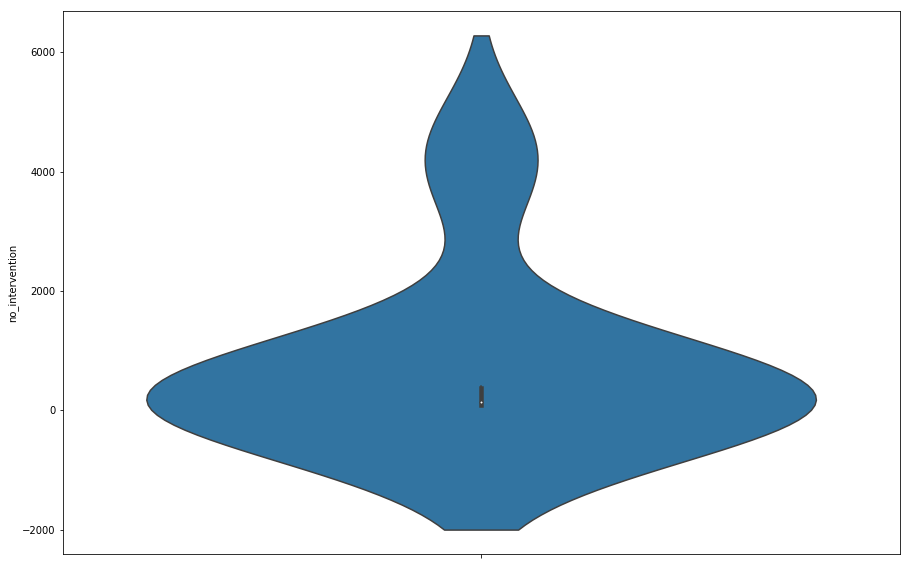

In [21]:
# I will be fully honnest. While this does give useful information about the distribution of species that does not
# require any intervention. I left it here as an easter egg, because it looks kind of like a buttplug.

# I simply want to see if humor drives up engagement


f, ax = plt.subplots(figsize=(15, 10))
ax = sns.violinplot(data=no_inter, y='no_intervention')
